In [1]:
# !unzip "/content/drive/MyDrive/ datasets/ct_covid.zip" -d "/content/CT_covid"

In [2]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import keras 
from keras.models import *
from keras.layers import *

from keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
directory = '/kaggle/input/augmented-xray-dataset/COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset'
data_df = pd.DataFrame(columns=['directory', 'class'])
count = 0
for filename in os.listdir(directory):
    if not filename == 'metadata.csv':
        for img in os.listdir(directory+"/"+filename):
            data_df = data_df.append({'directory':directory+"/"+filename+"/"+img, 'class':filename}, ignore_index = True)

                                              directory      class
1599  /kaggle/input/augmented-xray-dataset/COVID19_P...     normal
662   /kaggle/input/augmented-xray-dataset/COVID19_P...  pneumonia
3086  /kaggle/input/augmented-xray-dataset/COVID19_P...      covid
3001  /kaggle/input/augmented-xray-dataset/COVID19_P...     normal
433   /kaggle/input/augmented-xray-dataset/COVID19_P...  pneumonia
covid COVID19(420).jpg
(605, 756, 3)


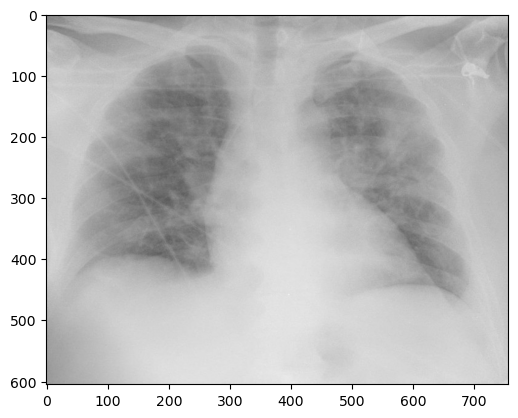

In [5]:
data_df = data_df.sample(frac = 1, random_state=7)
print(data_df.head(5))

test_img_path = data_df.iloc[5][0]
test_img = cv2.imread(test_img_path)
print(test_img_path.split("/")[-2], test_img_path.split("/")[-1])
print(test_img.shape)
plt.imshow(test_img)

In [6]:
batch_size = 32
size = (224, 224, 3)
img_width = img_hight = size[0]
random_state = 7

classes = list(data_df['class'].unique())
classes

['normal', 'pneumonia', 'covid']

In [7]:
# from sklearn.model_selection import train_test_split
# from keras.preprocessing.image import ImageDataGenerator

# #* Creating data generators
# data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Paper_train_split , Paper_test_split , _ , _ = train_test_split(data_df, data_df['class'], train_size=0.8, random_state=7, stratify=data_df['class'])


# paper_train_data = data_gen.flow_from_dataframe(Paper_train_split, x_col='directory', y_col='class',
#                                           image_size=(img_hight, img_width), target_size=(
#                                               img_hight, img_hight), color_mode='rgb',
#                                           batch_size=batch_size, class_mode='categorical',
#                                           classes=classes, subset=None, validate_filenames= False,seed=42)

# Unshuffled_paper_train_data = data_gen.flow_from_dataframe(Paper_train_split, x_col='directory', y_col='class',
#                                           image_size=(img_hight, img_width), target_size=(
#                                               img_hight, img_hight), color_mode='rgb',
#                                           batch_size=batch_size, class_mode='categorical',
#                                           classes=classes, subset=None, validate_filenames= False,seed=42, shuffle = False)

# #Validation Data Generator
# paper_val_data = data_gen.flow_from_dataframe(Paper_test_split, x_col='directory', y_col='class',
#                                           image_size=(img_hight, img_width), target_size=(
#                                               img_hight, img_hight), color_mode='rgb',
#                                           batch_size=batch_size, class_mode='categorical',
#                                           classes=classes, subset=None, validate_filenames= False,seed=42)

# Unshuffled_paper_val_data = data_gen.flow_from_dataframe(Paper_test_split, x_col='directory', y_col='class',
#                                           image_size=(img_hight, img_width), target_size=(
#                                               img_hight, img_hight), color_mode='rgb',
#                                           batch_size=batch_size, class_mode='categorical',
#                                           classes=classes, subset=None, validate_filenames= False,seed=42,shuffle = False)

# Paper_train_split

In [8]:
from sklearn.model_selection import train_test_split

train_df , test_df , _ , _  = train_test_split(data_df, data_df['class'],
                                                                         train_size=0.8, random_state=7,
                                                                         stratify=data_df['class'])

# Paper_train_split , Paper_test_split , _ , _ = train_test_split(data_df, data_df['class'], train_size=0.8, random_state=7, stratify=data_df['class'])


# val_df , test_df , val_class , test_class = train_test_split(val_test_df, val_test_class,
#                                                              train_size=0.5, random_state=7,
#                                                              stratify=val_test_class)

print("Train Split :", round((train_df.shape[0] / data_df['directory'].shape[0]),3))
print("test Split :",round((test_df.shape[0] / data_df['directory'].shape[0]),3))
#print("Test Split :",round((test_df.shape[0] / data_df['directory'].shape[0]),3))

print("training images :" ,len(train_df))
print("validation images :",len(test_df))
#print("testing images :",len(test_df))

Train Split : 0.8
test Split : 0.2
training images : 3660
validation images : 915


In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_dataframe(train_df, x_col='directory', y_col='class',
                                          image_size=(img_hight, img_width), target_size=(
                                              img_hight, img_hight), color_mode='rgb',
                                          batch_size=batch_size, class_mode='categorical',
                                          classes=classes, validate_filenames= False,seed=42,shuffle=True)

#Validation Data Generator
val_data = train_gen.flow_from_dataframe(test_df, x_col='directory', y_col='class',
                                          image_size=(img_hight, img_width), target_size=(
                                              img_hight, img_hight), color_mode='rgb',
                                          batch_size=batch_size, class_mode='categorical',
                                          classes=classes,  validate_filenames= False,seed=42,shuffle=True)

#Test Data Generator
test_data = test_gen.flow_from_dataframe(test_df, x_col='directory', y_col='class',
                                          image_size=(img_hight, img_width), target_size=(
                                              img_hight, img_hight), color_mode='rgb',
                                          batch_size=batch_size, class_mode='categorical',
                                          classes=classes, subset=None, validate_filenames= False, seed=42,shuffle=False)


Found 3660 non-validated image filenames belonging to 3 classes.
Found 915 non-validated image filenames belonging to 3 classes.
Found 915 non-validated image filenames belonging to 3 classes.


In [10]:
from keras.layers import GlobalAveragePooling2D, Reshape, Dense, Input
import tensorflow as tf
from keras.layers import Input,Dropout, Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Reshape, Multiply, Add, Lambda,Flatten
from keras.models import Model
import tensorflow_addons as tfa
 

def squeeze_excitation_block(inputs, ratio=8):
    b, _, _, c = inputs.shape
    x = GlobalAveragePooling2D()(inputs)
    x = Dense(c//ratio, activation="relu", use_bias=False)(x)
    x = Dense(c, activation="sigmoid", use_bias=False)(x)
#     x = tf.math.multiply(inputs,x)
    x = keras.layers.multiply([inputs,x])
    return x


# Define the input shape
input_shape = size


# Define the input tensor
inputs = Input(shape=input_shape)

# Apply convolutional layers 1
conv1 = Conv2D(32, (5, 5), padding='same', activation='relu')(inputs)
mish1 = tfa.activations.mish(conv1)
# Apply Squeeze and Excitation block
se1 = squeeze_excitation_block(mish1)
pool1= MaxPooling2D(pool_size=(2, 2),strides=(2, 2))(se1)
drop1 =Dropout(0.5)(pool1)

# Apply convolutional layers 2
conv2 = Conv2D(32, (5, 5), padding='same', activation='relu')(drop1)
mish2 = tfa.activations.mish(conv2)
# Apply Squeeze and Excitation block
se2 = squeeze_excitation_block(mish2)
pool2= MaxPooling2D(pool_size=(2, 2),strides=(2, 2))(se2)
drop2 =Dropout(0.5)(pool2)

# Apply convolutional layers 3
conv3 = Conv2D(64, (5, 5), padding='same', activation='relu')(drop2)
mish3 = tfa.activations.mish(conv3)
# Apply Squeeze and Excitation block
se3 = squeeze_excitation_block(mish3)
pool3= MaxPooling2D(pool_size=(2, 2),strides=(2, 2))(se3)
drop3 =Dropout(0.5)(pool3)

# Apply convolutional layers 4
conv4 = Conv2D(128, (5, 5), padding='same', activation='relu')(drop3)
mish4 = tfa.activations.mish(conv4)
# Apply Squeeze and Excitation block
se4 = squeeze_excitation_block(mish4)
pool4= MaxPooling2D(pool_size=(2, 2),strides=(2, 2))(se4)
drop4 =Dropout(0.5)(pool4)

# Apply convolutional layers 4
conv5 = Conv2D(256, (5, 5), padding='same', activation='relu')(drop4)

flatten = Flatten()(conv5)

# Apply global average pooling and fully connected layers
#x = GlobalAveragePooling2D()(conv5)
x = Dense(256,activation='relu')(flatten)
#x = tfa.activations.mish(x)
outputs = Dense(3, activation='softmax')(x)


In [11]:
# Define the model
model = Model(inputs=inputs, outputs=outputs)
# Compile the model
model.compile(optimizer= tf.keras.optimizers.legacy.Adam(lr=0.0001, decay=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


SavingModel = ModelCheckpoint(filepath='se_model_x-ray_adam.h5', 
                              monitor='val_accuracy',
                              mode='max',
                              verbose=1,
                              save_best_only=True,
                              save_weights_only=False)

earlystop = EarlyStopping(monitor = 'val_accuracy', 
                          min_delta = 0, 
                          patience = 15,
                          verbose = 1,
                          restore_best_weights = True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.00000001)

callbacks = [ SavingModel,learning_rate_reduction]

In [13]:

results=model.fit( 
    train_data, 
    validation_data= val_data,  
    epochs=50,
    callbacks=callbacks
  )

Epoch 1/50


2023-07-09 14:08:36.051481: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


115/115 [==============================] - ETA: 0s - loss: 0.7903 - accuracy: 0.6342
Epoch 1: val_accuracy improved from -inf to 0.72459, saving model to se_model_x-ray_adam.h5
115/115 [==============================] - 98s 764ms/step - loss: 0.7903 - accuracy: 0.6342 - val_loss: 0.9035 - val_accuracy: 0.7246 - lr: 1.0000e-04
Epoch 2/50
115/115 [==============================] - ETA: 0s - loss: 0.5829 - accuracy: 0.7858
Epoch 2: val_accuracy improved from 0.72459 to 0.80874, saving model to se_model_x-ray_adam.h5
115/115 [==============================] - 66s 572ms/step - loss: 0.5829 - accuracy: 0.7858 - val_loss: 0.7599 - val_accuracy: 0.8087 - lr: 1.0000e-04
Epoch 3/50
115/115 [==============================] - ETA: 0s - loss: 0.5172 - accuracy: 0.8172
Epoch 3: val_accuracy improved from 0.80874 to 0.81749, saving model to se_model_x-ray_adam.h5
115/115 [==============================] - 66s 577ms/step - loss: 0.5172 - accuracy: 0.8172 - val_loss: 0.7652 - val_accuracy: 0.8175 - lr:

Text(0, 0.5, 'losses')

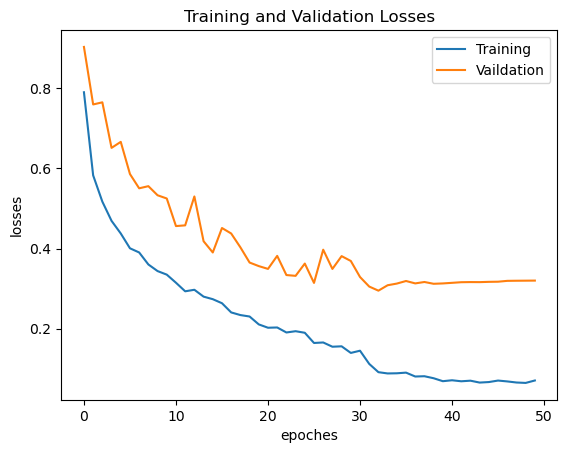

In [14]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training','Vaildation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoches')
plt.ylabel('losses')

Text(0, 0.5, 'accuracy')

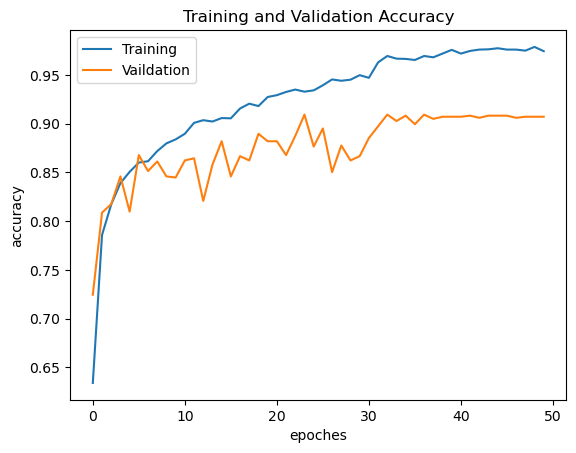

In [15]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training','Vaildation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoches')
plt.ylabel('accuracy')

In [16]:
pd.DataFrame.to_csv(pd.DataFrame(results.history),'his_se_model_x-ray_adam.csv', index=False)

In [17]:
y_pred= model.predict(test_data)

29/29 [==============================] - 13s 439ms/step


In [18]:
import numpy as np
y_pred1=np.argmax(y_pred,axis=1)  
y_pred1

array([0, 1, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 1, 2, 2, 1, 0, 2, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 1, 0, 1, 2, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0,
       0, 1, 2, 1, 2, 2, 0, 1, 2, 1, 1, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 2,
       0, 1, 2, 2, 1, 1, 2, 2, 2, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 2,
       0, 0, 0, 2, 2, 1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 1,
       1, 0, 1, 0, 0, 2, 2, 0, 2, 2, 0, 1, 2, 1, 1, 2, 0, 2, 1, 0, 2, 2,
       0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 1, 2, 0,
       1, 2, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1, 2, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 2, 0, 0, 2, 0, 2, 0, 1, 0, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1,
       2, 0, 0, 0, 1, 1, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1,
       0, 1, 0, 1, 2, 0, 1, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 1, 2, 1,
       2, 1, 1, 2, 0, 0, 0, 2, 1, 2, 2, 1, 1, 1, 2, 0, 1, 2, 0, 2, 2, 1,
       2, 0, 0, 1, 1, 1, 1, 0, 2, 1, 0, 2, 1, 1, 2,

In [19]:
from sklearn.metrics import accuracy_score,  confusion_matrix
confusion_matrix = confusion_matrix(test_data.labels,y_pred1)
print(confusion_matrix)

accuracy_score(test_data.labels,y_pred1)*100

[[291   6   8]
 [ 31 270   4]
 [ 19  17 269]]


90.7103825136612

In [20]:
cm_df = pd.DataFrame(confusion_matrix,
                     index = ['COVID19','NORMAL','PNEUMONIA'], 
                     columns = ['COVID19','NORMAL','PNEUMONIA'])
cm_df

,COVID19,NORMAL,PNEUMONIA
COVID19,291,6,8
NORMAL,31,270,4
PNEUMONIA,19,17,269


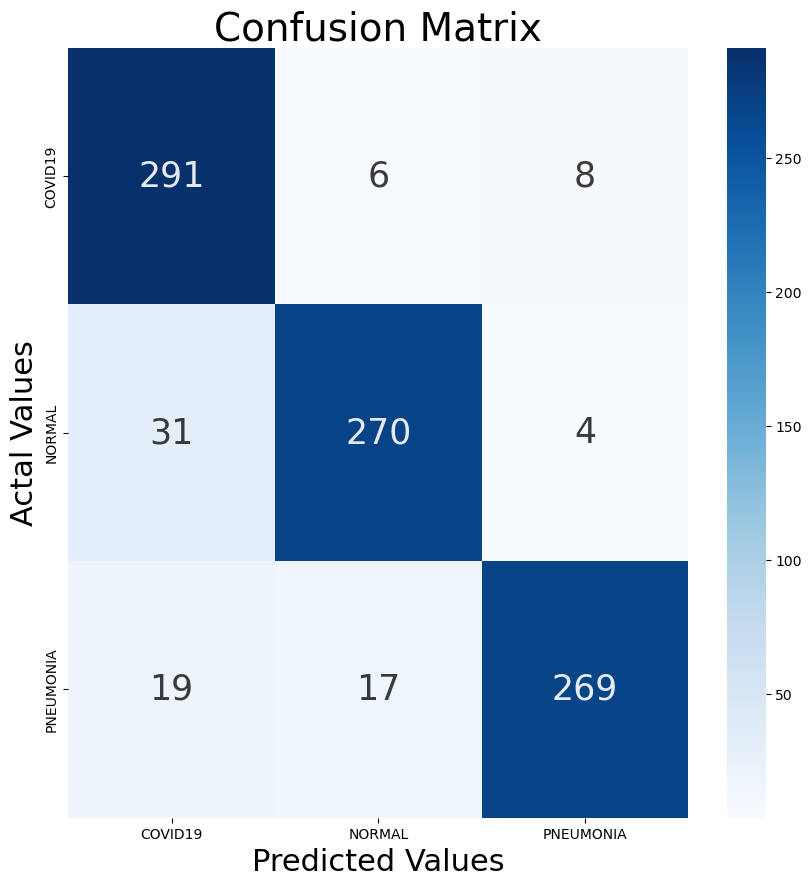

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

#Plotting the confusion matrix
plt.figure(figsize=(10,10))
#sns.heatmap(cm_df, annot=True,cmap=sns.cubehelix_palette(as_cmap=True),fmt="")

sns.heatmap(cm_df, annot=True,cmap='Blues',fmt="",annot_kws={'fontsize':25,'alpha':0.9})
# ,annot_kws={'fontsize':16, 
#            'fontstyle':'italic',  
#            'color':"k",
#            'alpha':0.9, 
#            'backgroundcolor':'w',
#            'verticalalignment':'center',
#            }
plt.title('Confusion Matrix',fontsize=28)
plt.ylabel('Actal Values',fontsize=22)
plt.xlabel('Predicted Values',fontsize=22)
plt.show()

In [22]:
from sklearn.metrics import classification_report
target_names = ['COVID19','NORMAL','PNEUMONIA']
report=classification_report(test_data.labels,y_pred1, target_names=target_names)
print(report)

              precision    recall  f1-score   support

     COVID19       0.85      0.95      0.90       305
      NORMAL       0.92      0.89      0.90       305
   PNEUMONIA       0.96      0.88      0.92       305

    accuracy                           0.91       915
   macro avg       0.91      0.91      0.91       915
weighted avg       0.91      0.91      0.91       915



In [23]:
reportdic=classification_report(test_data.labels,y_pred1, target_names=target_names, output_dict=True)
print(reportdic)
reportdic_df = pd.DataFrame(reportdic)
print(reportdic_df.head())

{'COVID19': {'precision': 0.8533724340175953, 'recall': 0.9540983606557377, 'f1-score': 0.9009287925696595, 'support': 305}, 'NORMAL': {'precision': 0.9215017064846417, 'recall': 0.8852459016393442, 'f1-score': 0.903010033444816, 'support': 305}, 'PNEUMONIA': {'precision': 0.9572953736654805, 'recall': 0.8819672131147541, 'f1-score': 0.9180887372013652, 'support': 305}, 'accuracy': 0.907103825136612, 'macro avg': {'precision': 0.9107231713892392, 'recall': 0.907103825136612, 'f1-score': 0.9073425210719469, 'support': 915}, 'weighted avg': {'precision': 0.9107231713892391, 'recall': 0.907103825136612, 'f1-score': 0.9073425210719469, 'support': 915}}
              COVID19      NORMAL   PNEUMONIA  accuracy   macro avg  \
precision    0.853372    0.921502    0.957295  0.907104    0.910723   
recall       0.954098    0.885246    0.881967  0.907104    0.907104   
f1-score     0.900929    0.903010    0.918089  0.907104    0.907343   
support    305.000000  305.000000  305.000000  0.907104  91

In [24]:
reportdic_df = reportdic_df.drop(columns=['macro avg', 	'weighted avg','accuracy'])

reportdic_df = reportdic_df.drop(labels='support', axis=0)
reportdic_df= reportdic_df.mul(100)
print(reportdic_df.head())

             COVID19     NORMAL  PNEUMONIA
precision  85.337243  92.150171  95.729537
recall     95.409836  88.524590  88.196721
f1-score   90.092879  90.301003  91.808874


In [25]:
reportdic_df

,COVID19,NORMAL,PNEUMONIA
precision,85.337243,92.150171,95.729537
recall,95.409836,88.524590,88.196721
f1-score,90.092879,90.301003,91.808874


In [30]:
import plotly.graph_objects as go
import pandas as pd

# Create a sample DataFrame
df = reportdic_df

# Define the bar chart colors

#colors = ['rgb(255, 51, 51)', 'rgb(51, 204, 51)', 'rgb(51, 51, 255)']
#colors = ['rgb(31, 119, 180)', 'rgb(255, 127, 14)', 'rgb(44, 160, 44)']

# Create the bar chart trace
fig = go.Figure(data=[
    go.Bar(name='COVID19', x=df.index, y=df['COVID19']),
    go.Bar(name='NORMAL', x=df.index, y=df['NORMAL']),
    go.Bar(name='PNEUMONIA', x=df.index, y=df['PNEUMONIA'])
])

# # Set the bar chart title and axis labels
fig.update_layout(title='Performance Metrics', xaxis_title='Metrics',
yaxis_title='Score',font=dict(size=22))

fig.update_yaxes(range=[80, 100])

# Display the bar chart
fig.show()

In [27]:
pd.DataFrame.to_csv(reportdic_df, 'reportresults.csv', index=False)

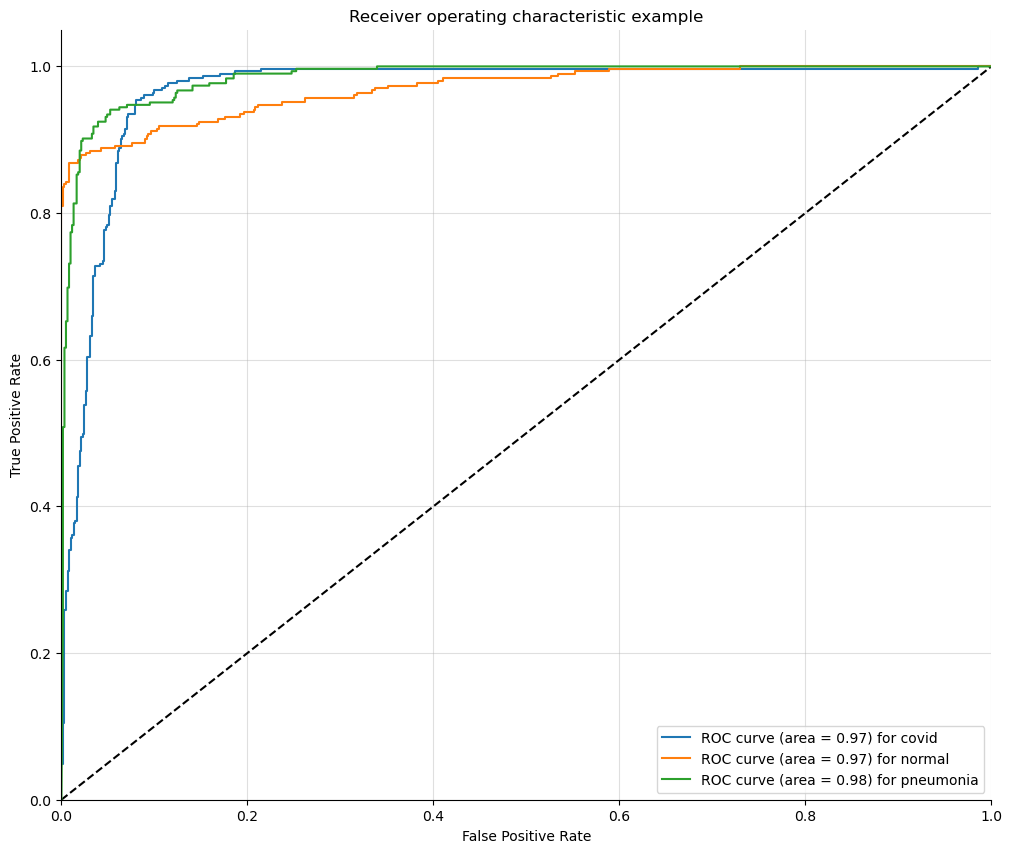

In [28]:
import seaborn as sns
from sklearn.metrics import roc_curve, auc

class_to_label_map = {2 : 'pneumonia', 0 : 'covid', 1 : 'normal'}
def plot_multiclass_roc(y_test, y_score, n_classes, figsize=(17, 6)):

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for %s' % (roc_auc[i], class_to_label_map[i]))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(test_data.classes,y_pred, n_classes=3, figsize=(12, 10))

In [29]:
print("done :)")

done :)
